In [45]:
### Making the dataset long format for analysis

import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("all_data_twotasks.csv")
df_long = pd.melt(
    df,
    id_vars=['subject', 'cnd'],
    value_vars=['d1', 'd5'],
    var_name='score_time',
    value_name='score'
)

subjects_per_group = df_long.groupby('cnd')['subject'].nunique()
print(subjects_per_group)

cnd
Control         10
Full            10
Reactivation    10
Name: subject, dtype: int64


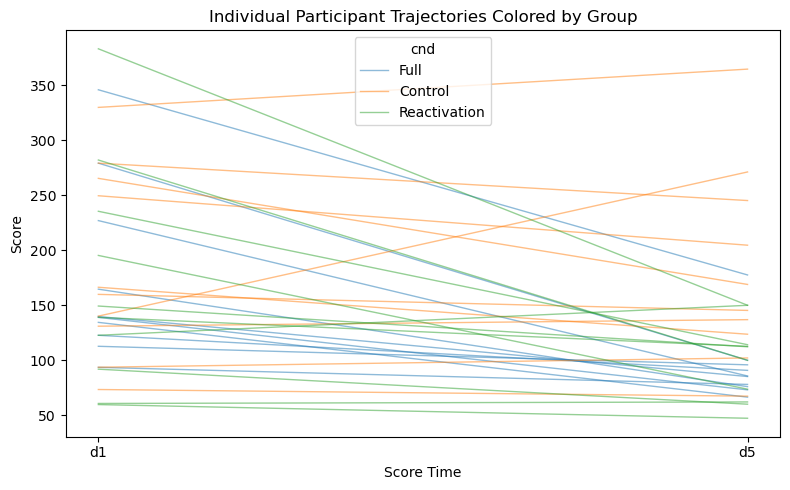

In [48]:
### checking individual participant trajectories colored by group
import seaborn as sns

plt.figure(figsize=(8, 5))

sns.lineplot(
    data=df_long,
    x="score_time",
    y="score",
    hue="cnd",         
    units="subject",    
    estimator=None,     
    alpha=0.5,
    lw=1
)

plt.title("Individual Participant Trajectories Colored by Group")
plt.xlabel("Score Time")
plt.ylabel("Score")
plt.tight_layout()
plt.show()


                        Mixed Linear Model Regression Results
Model:                      MixedLM           Dependent Variable:           score    
No. Observations:           60                Method:                       REML     
No. Groups:                 30                Scale:                        1574.7296
Min. group size:            2                 Log-Likelihood:               -308.1763
Max. group size:            2                 Converged:                    Yes      
Mean group size:            2.0                                                      
-------------------------------------------------------------------------------------
                                       Coef.   Std.Err.   z    P>|z|  [0.025   0.975]
-------------------------------------------------------------------------------------
Intercept                              188.774   28.789  6.557 0.000  132.349 245.199
score_time[T.d5]                        -5.843   22.113 -0.264 0.792  -49.184 

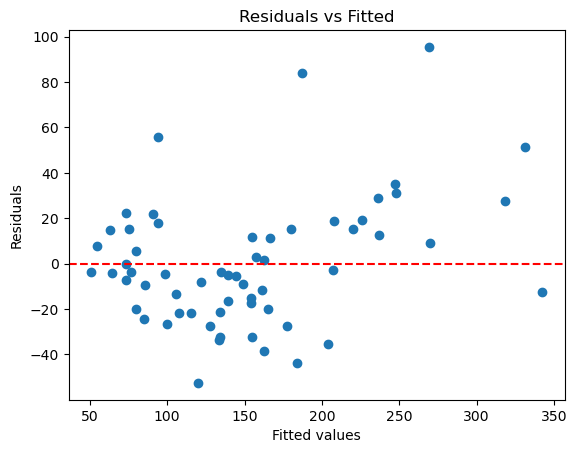

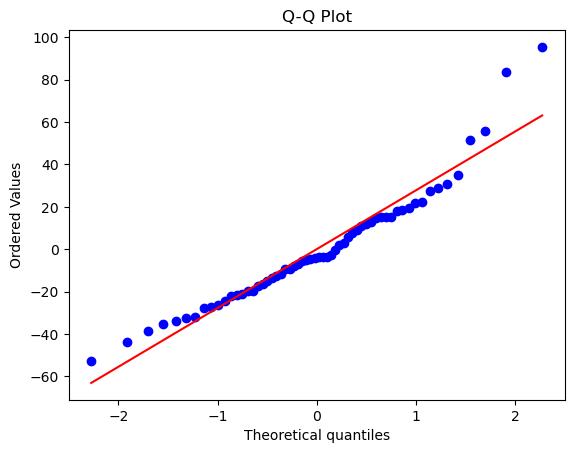

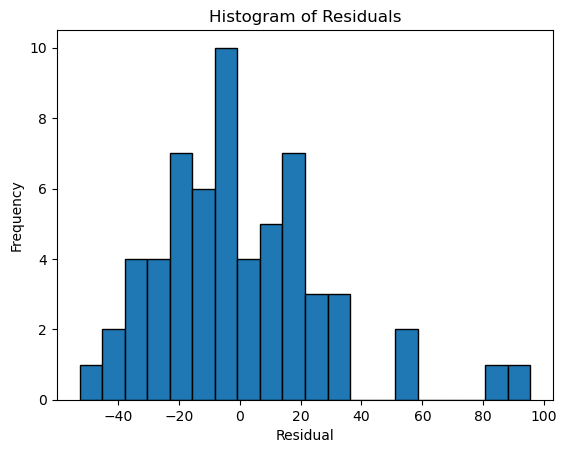

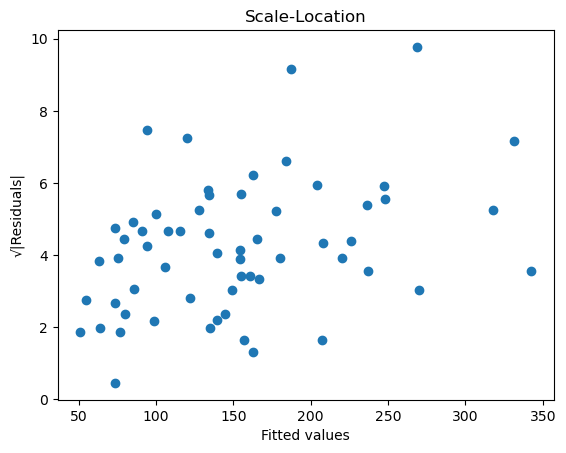

<F test: F=0.09433500782171116, p=0.9101274879417923, df_denom=54, df_num=2>


In [50]:
# Set Control as reference group (first in categories)
df_long['cnd'] = pd.Categorical(df_long['cnd'], categories=['Control', 'Full','Reactivation'])

# Fit linear mixed model: this gives you the exact formula you want
model = smf.mixedlm(
    "score ~ score_time * cnd",
    data=df_long,
    groups=df_long["subject"],
    re_formula="~score_time"
)
result = model.fit()
print(result.summary())

import matplotlib.pyplot as plt
import scipy.stats as stats

# Extract fitted values and residuals
fitted = result.fittedvalues
residuals = result.resid

# 1. Residuals vs Fitted (check homoscedasticity, linearity)
plt.scatter(fitted, residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

# 2. Q-Q plot (check normality of residuals)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

# 3. Histogram of residuals
plt.hist(residuals, bins=20, edgecolor="k")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# 4. Scale-Location plot (sqrt|residuals| vs fitted)
plt.scatter(fitted, abs(residuals) ** 0.5)
plt.xlabel("Fitted values")
plt.ylabel("√|Residuals|")
plt.title("Scale-Location")
plt.show()
# Joint test for Full vs Control AND Reactivation vs Control
joint_test = result.f_test("cnd[T.Full] = cnd[T.Reactivation] = 0")
print(joint_test)



                        Mixed Linear Model Regression Results
Model:                      MixedLM           Dependent Variable:           score    
No. Observations:           60                Method:                       REML     
No. Groups:                 30                Scale:                        1574.7296
Min. group size:            2                 Log-Likelihood:               -308.1763
Max. group size:            2                 Converged:                    Yes      
Mean group size:            2.0                                                      
-------------------------------------------------------------------------------------
                                       Coef.   Std.Err.   z    P>|z|  [0.025   0.975]
-------------------------------------------------------------------------------------
Intercept                              175.823   28.789  6.107 0.000  119.399 232.248
score_time[T.d5]                       -82.963   22.113 -3.752 0.000 -126.304 

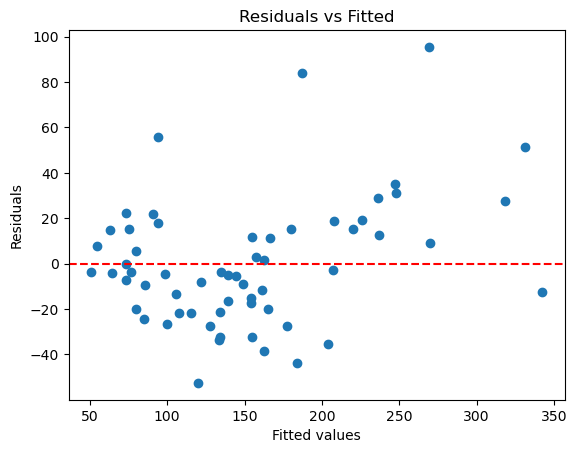

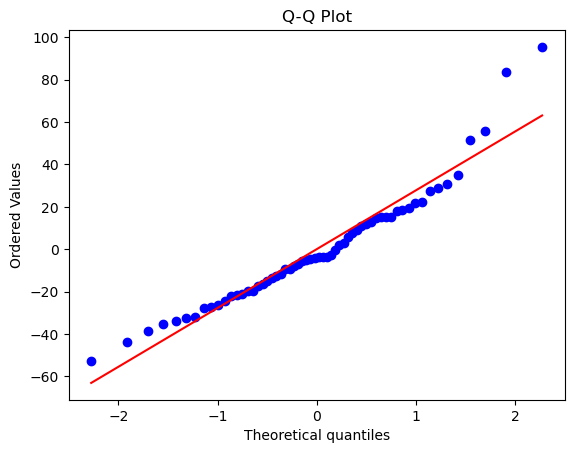

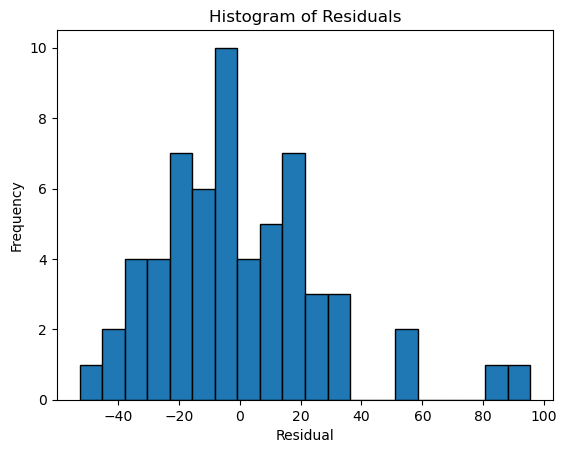

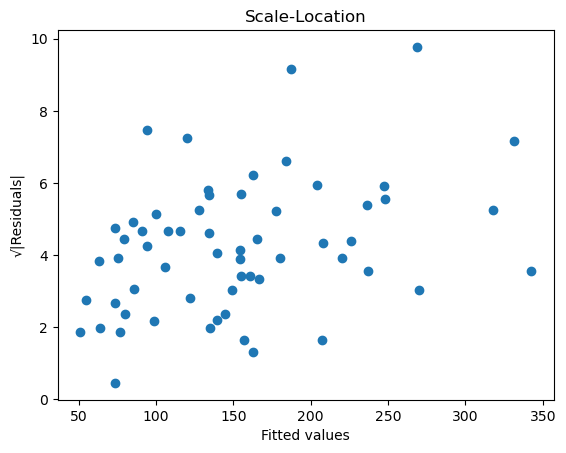

<F test: F=0.09433500782169951, p=0.9101274879418061, df_denom=54, df_num=2>


In [52]:
# Set Full as reference group (first in categories)
df_long['cnd'] = pd.Categorical(df_long['cnd'], categories=[ 'Full','Control','Reactivation'])

# Fit linear mixed model: this gives you the exact formula you want
model = smf.mixedlm(
    "score ~ score_time * cnd",
    data=df_long,
    groups=df_long["subject"],
    re_formula="~score_time"
)
result = model.fit()
print(result.summary())

import matplotlib.pyplot as plt
import scipy.stats as stats

# Extract fitted values and residuals
fitted = result.fittedvalues
residuals = result.resid

# 1. Residuals vs Fitted (check homoscedasticity, linearity)
plt.scatter(fitted, residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

# 2. Q-Q plot (check normality of residuals)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

# 3. Histogram of residuals
plt.hist(residuals, bins=20, edgecolor="k")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# 4. Scale-Location plot (sqrt|residuals| vs fitted)
plt.scatter(fitted, abs(residuals) ** 0.5)
plt.xlabel("Fitted values")
plt.ylabel("√|Residuals|")
plt.title("Scale-Location")
plt.show()
# Joint test for Full vs Control AND Reactivation vs Control
joint_test = result.f_test("cnd[T.Control] = cnd[T.Reactivation] = 0")
print(joint_test)



                     Mixed Linear Model Regression Results
Model:                     MixedLM         Dependent Variable:         score    
No. Observations:          60              Method:                     REML     
No. Groups:                30              Scale:                      1574.7296
Min. group size:           2               Log-Likelihood:             -308.1763
Max. group size:           2               Converged:                  Yes      
Mean group size:           2.0                                                  
--------------------------------------------------------------------------------
                                  Coef.   Std.Err.   z    P>|z|  [0.025   0.975]
--------------------------------------------------------------------------------
Intercept                         171.870   28.789  5.970 0.000  115.445 228.295
score_time[T.d5]                  -73.670   22.113 -3.331 0.001 -117.012 -30.329
cnd[T.Full]                         3.954   40.713

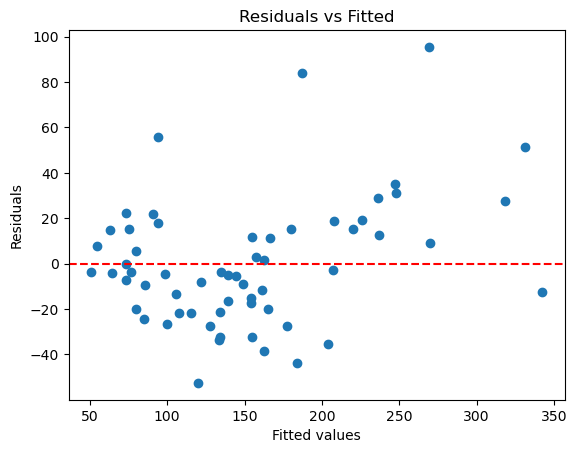

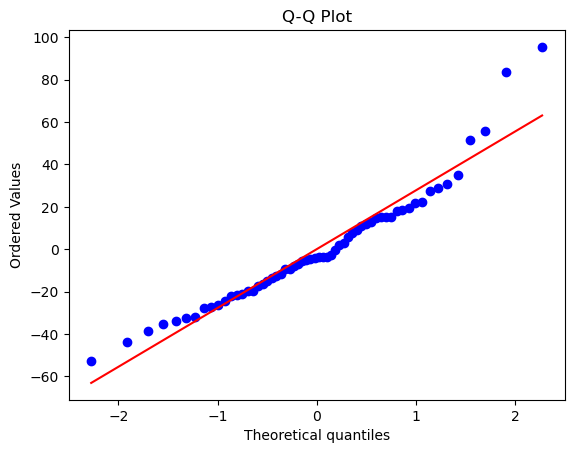

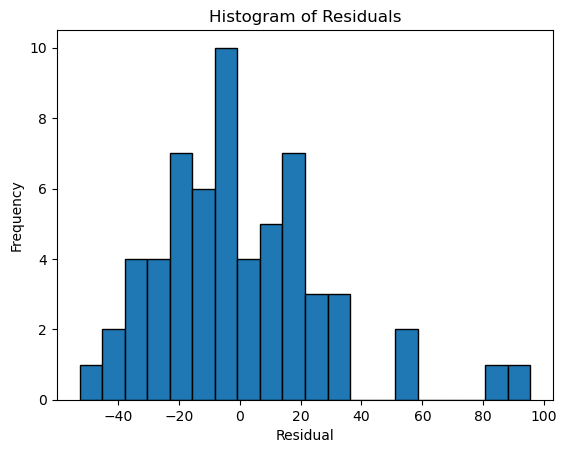

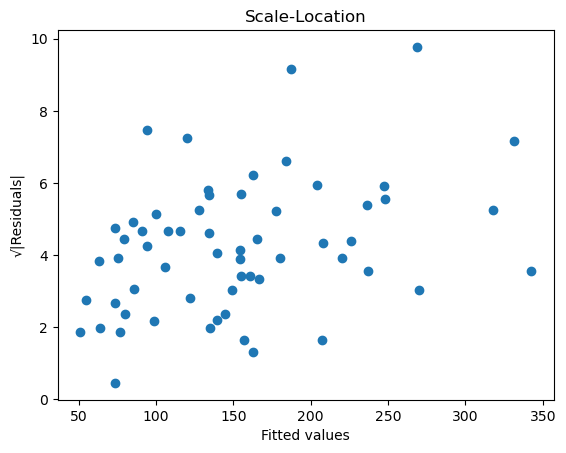

In [59]:
# Set Reminder as reference group (first in categories)
df_long['cnd'] = pd.Categorical(df_long['cnd'], categories=[ 'Reactivation','Full','Control'])

# Fit linear mixed model: this gives you the exact formula you want
model = smf.mixedlm(
    "score ~ score_time * cnd",
    data=df_long,
    groups=df_long["subject"],
    re_formula="~score_time"
)
result = model.fit()
print(result.summary())

import matplotlib.pyplot as plt
import scipy.stats as stats

# Extract fitted values and residuals
fitted = result.fittedvalues
residuals = result.resid

# 1. Residuals vs Fitted (check homoscedasticity, linearity)
plt.scatter(fitted, residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

# 2. Q-Q plot (check normality of residuals)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

# 3. Histogram of residuals
plt.hist(residuals, bins=20, edgecolor="k")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# 4. Scale-Location plot (sqrt|residuals| vs fitted)
plt.scatter(fitted, abs(residuals) ** 0.5)
plt.xlabel("Fitted values")
plt.ylabel("√|Residuals|")
plt.title("Scale-Location")
plt.show()




In [60]:
### Correlation between d5 scores and the percentage correction on 15 reminder trials in Reactivation group
from scipy.stats import pearsonr

df = pd.read_csv("all_data_twotasks.csv")
df_reactivation = df[df['cnd'] == 'Reactivation'].dropna(subset=['d5', 'reac_corr'])
corr_coef, p_value = pearsonr(df_reactivation['d5'], df_reactivation['reac_corr'])

print(f"Correlation between d5 scores and reac_corr in Reactivation group:")
print(f"r = {corr_coef:.3f}, p = {p_value:.3f}")


Correlation between d5 scores and reac_corr in Reactivation group:
r = 0.143, p = 0.714


Now looking at the transfer data

In [61]:
### Making the dataset now for transfer analysis

import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("all_data_twotasks.csv")

df_long_transfer = pd.melt(
    df,
    id_vars=['subject', 'cnd'],
    value_vars=['d5', 'Transfer'],
    var_name='score_time',
    value_name='score'
)

subjects_per_group = df_long.groupby('cnd', observed=True)['subject'].nunique()
print(subjects_per_group)

cnd
Reactivation    10
Full            10
Control         10
Name: subject, dtype: int64


In [ ]:
import scipy.stats as stats
import numpy as np

# Keep only participants with both d5 and Transfer
complete_subjects = (
    df_long_transfer.groupby("subject")["score_time"]
    .nunique()
    .reset_index()
    .query("score_time == 2")["subject"]
)

df_complete = df_long_transfer[df_long_transfer["subject"].isin(complete_subjects)]

# Run paired t-tests per group
results = {}
for group, subdf in df_complete.groupby("cnd", observed=False):
    # Pivot to wide format: each subject must have both d5 and Transfer
    wide = subdf.pivot(index="subject", columns="score_time", values="score")
    
    # Paired t-test
    t, p = stats.ttest_rel(wide["d5"], wide["Transfer"])
    
    # Degrees of freedom
    df_val = wide.shape[0] - 1
    
    # Cohen's d for paired samples
    diff = wide["d5"] - wide["Transfer"]
    cohen_d = diff.mean() / diff.std(ddof=1)
    
    results[group] = {
        "n": wide.shape[0],
        "mean_d5": wide["d5"].mean(),
        "mean_transfer": wide["Transfer"].mean(),
        "t": t,
        "df": df_val,
        "p": p,
        "cohen_d": cohen_d
    }

# Print results
for group, res in results.items():
    print(f"\n{group}:")
    print(f"  n = {res['n']}")
    print(f"  Mean D5 = {res['mean_d5']:.2f}")
    print(f"  Mean Transfer = {res['mean_transfer']:.2f}")
    print(f"  Paired t-test: t({res['df']}) = {res['t']:.2f}, p = {res['p']:.4f}, Cohen's d = {res['cohen_d']:.2f}")



Control:
  n = 7
  Mean D5 = 181.44
  Mean Transfer = 179.97
  Paired t-test: t(6) = 0.07, p = 0.9480, Cohen's d = 0.03

Full:
  n = 9
  Mean D5 = 93.71
  Mean Transfer = 128.83
  Paired t-test: t(8) = -3.95, p = 0.0042, Cohen's d = -1.32

Reactivation:
  n = 8
  Mean D5 = 94.79
  Mean Transfer = 157.40
  Paired t-test: t(7) = -2.19, p = 0.0647, Cohen's d = -0.77


/var/folders/b0/lql08qjj4gz4nxl4zqz30lsm0000gn/T/ipykernel_2171/2695193743.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group, subdf in df_complete.groupby("cnd"):
